In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Data_file = pd.read_csv(r"M:\Project_1\Weather_Pretiction\WeatherData\wind_dataset2020-2024.csv")
Data_file.head(8)

,DATE,WIND,RAIN,T.MAX,T.MIN
0,01-01-2020,13.67,0.2,9.5,3.7
1,02-01-2020,11.50,5.1,7.2,4.2
2,03-01-2020,11.25,0.4,5.5,0.5
3,04-01-2020,8.63,0.2,5.6,0.4
4,05-01-2020,11.92,10.4,7.2,-1.5
5,06-01-2020,10.67,0.0,6.5,1.2
6,07-01-2020,9.17,1.9,9.2,-2.4
7,08-01-2020,14.29,0.0,6.6,3.1


In [4]:
# show data info
Data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1520 non-null   object 
 1   WIND    1520 non-null   float64
 2   RAIN    1520 non-null   float64
 3   T.MAX   1220 non-null   float64
 4   T.MIN   1220 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [5]:
# Show statics
Data_file.describe()

,WIND,RAIN,T.MAX,T.MIN
count,1520.000000,1520.000000,1220.000000,1220.000000
mean,10.564599,1.759605,13.470738,6.148443
std,5.099639,3.752120,4.671140,4.629373
min,1.250000,0.000000,-0.100000,-11.000000
25%,6.660000,0.000000,10.100000,2.875000
50%,9.895000,0.200000,13.800000,6.200000
75%,13.790000,1.800000,17.125000,9.925000
max,29.580000,44.400000,25.500000,17.800000


In [6]:
# Remove missing values

Data_file.dropna()
print(Data_file)

            DATE   WIND  RAIN  T.MAX  T.MIN
0     01-01-2020  13.67   0.2    9.5    3.7
1     02-01-2020  11.50   5.1    7.2    4.2
2     03-01-2020  11.25   0.4    5.5    0.5
3     04-01-2020   8.63   0.2    5.6    0.4
4     05-01-2020  11.92  10.4    7.2   -1.5
...          ...    ...   ...    ...    ...
1515  24-02-2024  12.42   1.0    NaN    NaN
1516  25-02-2024   4.79   0.0    NaN    NaN
1517  26-02-2024  10.83   0.4    NaN    NaN
1518  27-02-2024   8.46   0.1    NaN    NaN
1519  28-02-2024  11.00   1.1    NaN    NaN

[1520 rows x 5 columns]


In [7]:
# Remove Duplicate rows
Data_file.drop_duplicates()
Data_file.dropna(inplace= True)
Data_file

,DATE,WIND,RAIN,T.MAX,T.MIN
0,01-01-2020,13.67,0.2,9.5,3.7
1,02-01-2020,11.50,5.1,7.2,4.2
2,03-01-2020,11.25,0.4,5.5,0.5
3,04-01-2020,8.63,0.2,5.6,0.4
4,05-01-2020,11.92,10.4,7.2,-1.5
...,...,...,...,...,...
1456,27-12-2023,10.37,2.8,4.2,-0.9
1457,28-12-2023,6.96,1.8,7.9,-3.6
1458,29-12-2023,17.88,1.3,9.4,-3.4
1459,30-12-2023,20.30,3.4,5.6,5.0


In [8]:
Wind = Data_file['WIND']
print(Wind)

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
1456    10.37
1457     6.96
1458    17.88
1459    20.30
1460    19.83
Name: WIND, Length: 1220, dtype: float64


0    13.67
1    11.50
2    11.25
3     8.63
4    11.92
5    10.67
6     9.17
Name: WIND, dtype: float64


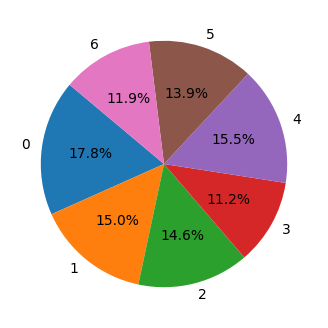

In [9]:
wind_5 = Data_file['WIND'].head(7)
print(wind_5)
explode = (0.3,0,0,0,0,0,0)
plt.figure(figsize=(4,4))

plt.pie(wind_5, labels=wind_5.index, autopct='%1.1f%%', startangle=140)

plt.show()

In [10]:

# # Load the dataset
# # file_path = "M:\Project_1\WeatherData\wind_dataset2020-2024.csv" )
# data = pd.read_csv(file_path)

# # Convert the DATE column to datetime format with the correct format
# data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y', errors='coerce')

# # Remove rows with invalid dates
# data = data.dropna(subset=['DATE'])

# # Create a bar chart for the WIND column
# plt.figure(figsize=(10, 6))
# plt.bar(data['DATE'], data['WIND'])

# plt.xlabel('Date')
# plt.ylabel('Wind Speed')
# plt.title('Wind Speed Over Time')
# plt.grid(True)

# plt.show()


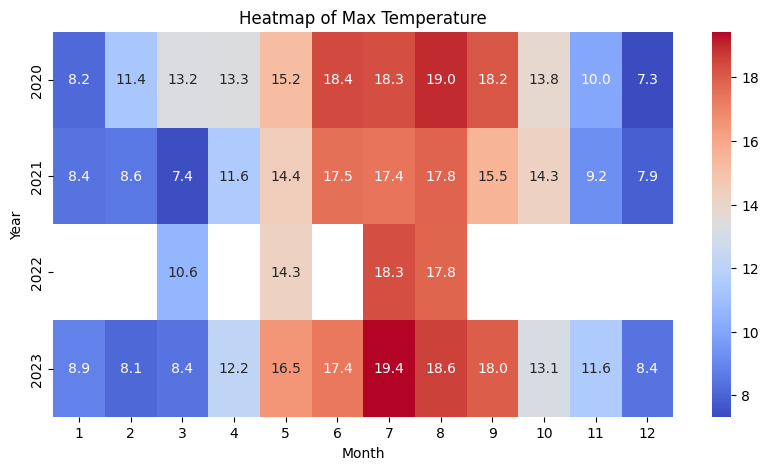

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"M:\Project_1\Weather_Pretiction\WeatherData\wind_dataset2020-2024.csv"
data = pd.read_csv(file_path)

# Convert the DATE column to datetime format with the correct format
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y', errors='coerce')

# Remove rows with invalid dates
data = data.dropna(subset=['DATE'])

# Create a pivot table for the heatmap
heatmap_data = data.pivot_table(index=data['DATE'].dt.year, columns=data['DATE'].dt.month, values=['T.MAX', 'T.MIN', 'T.MIN'])

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(heatmap_data['T.MAX'], cmap='coolwarm', annot=True, fmt='.1f')

plt.title('Heatmap of Max Temperature')
plt.xlabel('Month')
plt.ylabel('Year')

plt.show()



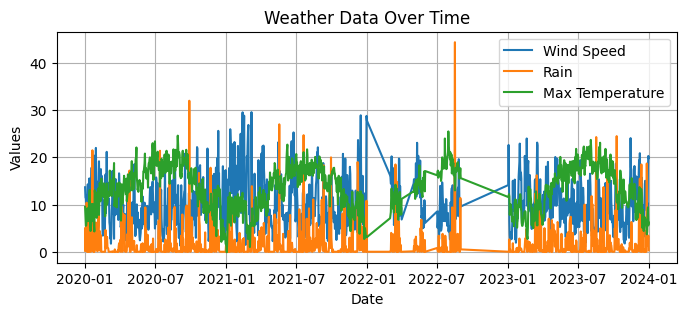

In [12]:
# Convert the DATE column to datetime format with the correct format

Data_file['DATE'] = pd.to_datetime(Data_file['DATE'], format='%d-%m-%Y', errors='coerce')

# Remove rows with invalid dates
Data_file = Data_file.dropna(subset=['DATE'])

# Plot the data
plt.figure(figsize=(8, 3))

plt.plot(Data_file['DATE'], Data_file['WIND'], label='Wind Speed')
plt.plot(Data_file['DATE'], Data_file['RAIN'], label='Rain')
plt.plot(Data_file['DATE'], Data_file['T.MAX'], label='Max Temperature')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Weather Data Over Time')
plt.legend()
plt.grid(True)

plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
# Load the dataset
file_path = r"M:\Project_1\Weather_Pretiction\WeatherData\wind_dataset2020-2024.csv"
data = pd.read_csv(file_path)

In [15]:
# Convert DATE column to datetime format, handling errors
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y', errors='coerce')

# Remove invalid date rows
data = data.dropna(subset=['DATE'])

# Extract year, month, and day
data['YEAR'] = data['DATE'].dt.year
data['MONTH'] = data['DATE'].dt.month
data['DAY'] = data['DATE'].dt.day

# Define features and target
X = data[['YEAR', 'MONTH', 'DAY', 'WIND']]
y_rain = data['RAIN']

# Display cleaned data
print(data.head())


        DATE   WIND  RAIN  T.MAX  T.MIN  YEAR  MONTH  DAY
0 2020-01-01  13.67   0.2    9.5    3.7  2020      1    1
1 2020-01-02  11.50   5.1    7.2    4.2  2020      1    2
2 2020-01-03  11.25   0.4    5.5    0.5  2020      1    3
3 2020-01-04   8.63   0.2    5.6    0.4  2020      1    4
4 2020-01-05  11.92  10.4    7.2   -1.5  2020      1    5


In [16]:
# Split the data into training and testing sets
X_train, X_test, y_rain_train, y_rain_test = train_test_split(X, y_rain, test_size=0.2, random_state=42)

In [17]:
# Train a linear regression model for rain prediction
rain_model = LinearRegression()
rain_model.fit(X_train, y_rain_train)

LinearRegression()

In [18]:
# Make predictions
rain_predictions = rain_model.predict(X_test)

In [19]:
# Evaluate the model
rain_mse = mean_squared_error(y_rain_test, rain_predictions)
r2 = r2_score(y_rain_test, rain_predictions)
acc_per = r2 *100
print(f'Rain model MSE: {rain_mse}')
print(f'Accuracy Percentage: {acc_per}')

Rain model MSE: 9.317754096160714
Accuracy Percentage: 4.1138068893794895


In [20]:
# Predict future rain (example for January 1, 2025)
future_date = pd.DataFrame({'YEAR': [2025], 'MONTH': [1], 'DAY': [1], 'WIND': [10]})
future_rain = rain_model.predict(future_date)

In [21]:
print(f'Predicted rain: {future_rain[0]}')

Predicted rain: 1.6991278450579514


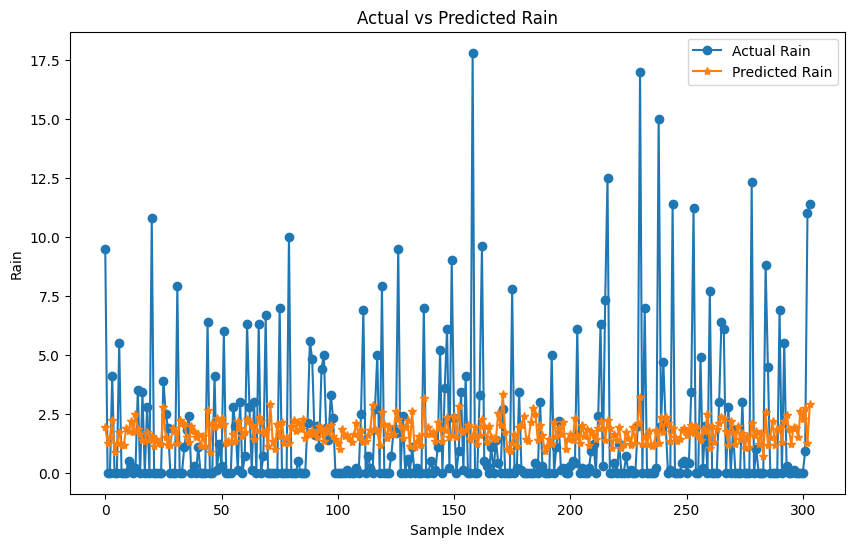

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_rain_test)), y_rain_test, label='Actual Rain', linestyle='-', marker='o')
plt.plot(range(len(y_rain_test)), rain_predictions, label='Predicted Rain', linestyle='-', marker='*')
plt.xlabel('Sample Index')
plt.ylabel('Rain')
plt.title('Actual vs Predicted Rain')
plt.legend()
plt.show()

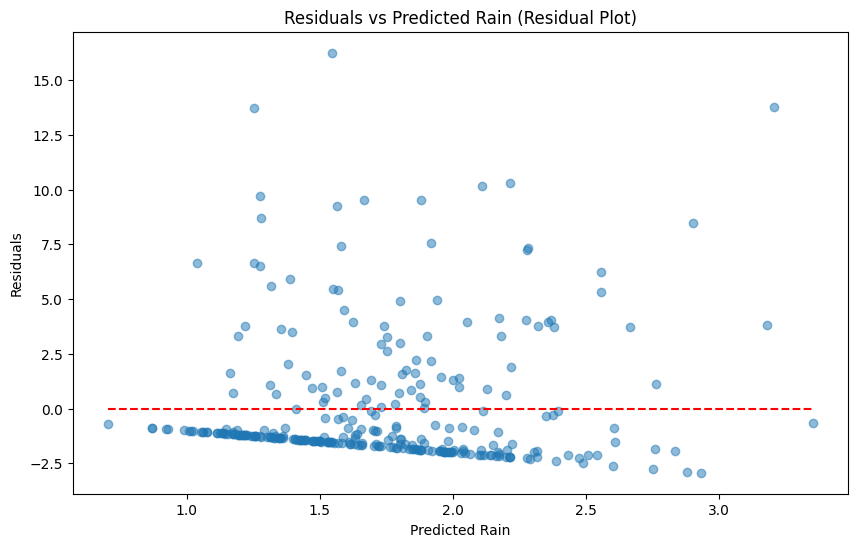

In [23]:
plt.figure(figsize=(10, 6))
residuals = y_rain_test - rain_predictions
plt.scatter(rain_predictions, residuals, alpha=0.5)
plt.hlines(y=0, xmin=rain_predictions.min(), xmax=rain_predictions.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Rain')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Rain (Residual Plot)')
plt.show()